In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Load the data into a pandas DataFrame
data = pd.read_csv('new.csv')
data.dropna(inplace=True)

In [3]:
data['FIPS'] = pd.to_datetime(data['FIPS'])
data['FIPS']

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
36619   2020-12-31
36620   2020-12-31
36622   2020-12-31
36623   2020-12-31
36624   2020-12-31
Name: FIPS, Length: 14932, dtype: datetime64[ns]

In [4]:

# Sort the data by FIPS
data['FIPS'] = pd.to_datetime(data['FIPS'], format="%Y%m%d").sort_values(ascending=True)
data['FIPS']

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
36619   2020-12-31
36620   2020-12-31
36622   2020-12-31
36623   2020-12-31
36624   2020-12-31
Name: FIPS, Length: 14932, dtype: datetime64[ns]

In [5]:
# filter the tamilnadu values 

some_value ='Tamil Nadu'

# print(data.head())
# print(data.dtypes)
#sortedDateValue =  data.sort_values(by='FIPS', inplace = True)

data = data.loc[data['Province_State'] == some_value]
data.describe()

,Lat,Long_,Deaths,Incident_Rate,Case_Fatality_Ratio
count,4.210000e+02,4.210000e+02,421.000000,421.000000,421.000000
mean,1.100609e+01,7.840062e+01,13552.344418,1268.847776,1.432861
std,9.959434e-14,8.109825e-13,8955.994622,932.867342,0.166040
min,1.100609e+01,7.840062e+01,307.000000,44.852816,0.879303
25%,1.100609e+01,7.840062e+01,9010.000000,716.842135,1.326783
50%,1.100609e+01,7.840062e+01,12188.000000,1057.512335,1.469379
75%,1.100609e+01,7.840062e+01,13258.000000,1316.858062,1.530985
max,1.100609e+01,7.840062e+01,34197.000000,3298.251813,1.726175


In [6]:
# Create a new DataFrame with FIPS column converted to ordinal values
date_df = pd.DataFrame({'date_ordinal': data['FIPS'].apply(lambda x: x.toordinal())})


In [7]:
# Create a new DataFrame with Active column
count_df = pd.DataFrame({'Active': data['Active']})


In [8]:

# Concatenate the two DataFrames
merged_df = pd.concat([date_df, count_df], axis=1)


In [9]:

# Create the linear regression model
reg = LinearRegression()



In [10]:
# Split the data into training and testing sets
train_size = int(len(merged_df) * 0.8)
train_set = merged_df[:train_size]
test_set = merged_df[train_size:]




In [11]:
# Fit the model on the training set
reg.fit(train_set[['date_ordinal']], train_set[['Active']])



LinearRegression()

In [12]:
# Predict the Active values using the testing set
predictions = reg.predict(test_set[['date_ordinal']])

predictions

array([[45706.8868048 ],
       [48121.27960533],
       [50457.78876712],
       [52872.18156765],
       [55208.69072945],
       [50691.4396833 ],
       [50769.32332203],
       [50847.20696076],
       [50925.09059948],
       [51002.97423821],
       [51080.85787693],
       [51158.74151567],
       [51236.62515439],
       [51314.50879312],
       [51392.39243184],
       [51470.27607057],
       [51548.1597093 ],
       [51626.04334802],
       [51703.92698675],
       [51781.81062548],
       [51859.6942642 ],
       [51937.57790293],
       [52015.46154165],
       [52093.34518038],
       [29195.55539477],
       [31609.94819529],
       [33868.57371836],
       [36282.96651889],
       [38619.47568068],
       [41033.8684812 ],
       [43370.377643  ],
       [45784.77044353],
       [48199.16324405],
       [50535.67240585],
       [52950.06520637],
       [55286.57436817],
       [53105.83248383],
       [53183.71612255],
       [53261.59976128],
       [53339.48340001],


In [13]:
# Calculate the R-squared value
r_squared = r2_score(test_set[['Active']], predictions)

r_squared

-7.638354126000088

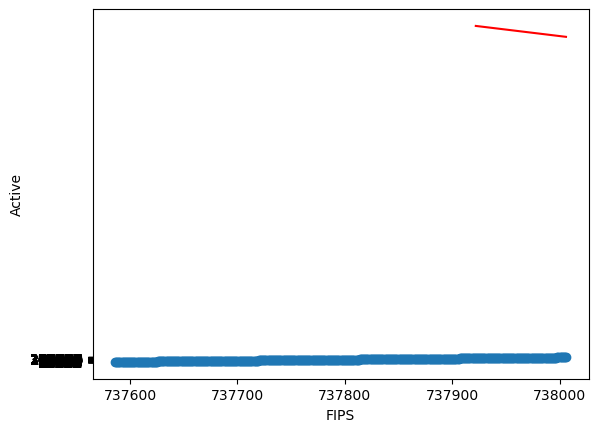

In [38]:
# Visualize the data and the linear regression line
plt.scatter(merged_df['date_ordinal'], merged_df['Active'])
plt.plot(test_set['date_ordinal'], predictions, color='red')
plt.xlabel('FIPS')
plt.ylabel('Active')
plt.show()

